# Energy Market Resilience Metrics: Analyzing Vulnerabilities and Preparing for Disruptions

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data
hist_d = pd.read_csv('AMDARi/historical_energy_data.csv')
infr_d = pd.read_csv('AMDARi/infrastructure_data.csv')
mkt_d = pd.read_csv('AMDARi/market_data.csv')
reg_d = pd.read_csv('AMDARi/regulatory_data.csv')

In [3]:
hist_d.head()

,Date/Time,Location/Region,Energy Source,Energy Demand,Energy Consumption (kWh),Energy Price,Operational Costs,Energy Production (kWh)
0,01/01/2012,Region A,Fossil Fuels,24016,21848,0.131630,1564.239198,31604
1,02/01/2012,Region C,Fossil Fuels,56200,34796,0.160969,3837.295411,11734
2,03/01/2012,Region A,Renewables,81268,36244,0.155890,4418.260676,31523
3,04/01/2012,Region C,Fossil Fuels,61287,19955,0.130128,3743.417970,21205
4,05/01/2012,Region B,Fossil Fuels,93447,13788,0.151835,1071.513936,19548


In [4]:
infr_d.head()

,Date/Time,Infrastructure Status,Maintenance Activities,Technology Limitations
0,01/01/2012,Poor,Repairs,High
1,02/01/2012,Poor,Upgrades,High
2,03/01/2012,Fair,Upgrades,High
3,04/01/2012,Poor,Repairs,High
4,05/01/2012,Poor,Repairs,High


In [5]:
mkt_d.head()

,Date/Time,Market Price,Competitor Data,Market Trends,Market Demand
0,2012-01-01,0.167891,High,Upward,13518
1,2012-01-02,0.151762,Medium,Upward,2115
2,2012-01-03,0.241443,High,Stable,22353
3,2012-01-04,0.071104,Low,Downward,25482
4,2012-01-05,0.107281,High,Stable,20264


In [6]:
reg_d.head()

,Date/Time,Regulatory Changes,Compliance Status,Compliance Costs
0,2012-01-01,New Regulation,Compliant,3281.685306
1,2012-01-02,Amendment,Non-compliant,2037.272281
2,2012-01-03,Amendment,Non-compliant,629.891778
3,2012-01-04,New Regulation,Non-compliant,2277.898351
4,2012-01-05,Amendment,Non-compliant,4687.163688


## Understanding the struture of Datasets

In [7]:
hist_d.info()
hist_d.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date/Time                 1000 non-null   object 
 1   Location/Region           1000 non-null   object 
 2   Energy Source             1000 non-null   object 
 3   Energy Demand             1000 non-null   int64  
 4   Energy Consumption (kWh)  1000 non-null   int64  
 5   Energy Price              1000 non-null   float64
 6   Operational Costs         1000 non-null   float64
 7   Energy Production (kWh)   1000 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


,Energy Demand,Energy Consumption (kWh),Energy Price,Operational Costs,Energy Production (kWh)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49336.335000,24249.533000,0.126752,3002.452425,25502.488000
std,28215.243714,14092.904681,0.042857,1189.898418,14057.976149
min,1015.000000,505.000000,0.050368,1000.630978,850.000000
25%,25812.750000,12017.750000,0.091048,1957.452731,13235.750000
50%,49398.500000,23178.000000,0.126799,2954.748776,24946.000000
75%,73877.500000,36563.000000,0.163701,4095.759662,37653.250000
max,99941.000000,49985.000000,0.199951,4995.000138,49936.000000


In [8]:
infr_d.info()
infr_d.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date/Time               1000 non-null   object
 1   Infrastructure Status   1000 non-null   object
 2   Maintenance Activities  1000 non-null   object
 3   Technology Limitations  987 non-null    object
dtypes: object(4)
memory usage: 31.4+ KB


,Date/Time,Infrastructure Status,Maintenance Activities,Technology Limitations
count,1000,1000,1000,987
unique,1000,3,3,3
top,01/01/2012,Poor,Routine Maintenance,High
freq,1,641,360,776


In [9]:
mkt_d.info()
mkt_d.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date/Time        1000 non-null   object 
 1   Market Price     1000 non-null   float64
 2   Competitor Data  1000 non-null   object 
 3   Market Trends    1000 non-null   object 
 4   Market Demand    1000 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


,Market Price,Market Demand
count,1000.000000,1000.000000
mean,0.139154,25392.807000
std,0.063492,13980.103619
min,0.030053,836.000000
25%,0.084488,13515.250000
50%,0.138719,24910.500000
75%,0.192279,37102.750000
max,0.249960,49941.000000


In [10]:
reg_d.info()
reg_d.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date/Time           1000 non-null   object 
 1   Regulatory Changes  1000 non-null   object 
 2   Compliance Status   1000 non-null   object 
 3   Compliance Costs    1000 non-null   float64
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


,Compliance Costs
count,1000.000000
mean,2841.451262
std,1276.101688
min,503.841638
25%,1778.330823
50%,2906.980088
75%,3892.981360
max,4987.232664


## Data Cleaning
- Make the Date/Time Column of all datasets the same i.e same data format

In [11]:
hist_d.head(1)

,Date/Time,Location/Region,Energy Source,Energy Demand,Energy Consumption (kWh),Energy Price,Operational Costs,Energy Production (kWh)
0,01/01/2012,Region A,Fossil Fuels,24016,21848,0.13163,1564.239198,31604


In [12]:
infr_d.head(1)

,Date/Time,Infrastructure Status,Maintenance Activities,Technology Limitations
0,01/01/2012,Poor,Repairs,High


In [13]:
mkt_d.head(1)

,Date/Time,Market Price,Competitor Data,Market Trends,Market Demand
0,2012-01-01,0.167891,High,Upward,13518


In [14]:
reg_d.head(1)

,Date/Time,Regulatory Changes,Compliance Status,Compliance Costs
0,2012-01-01,New Regulation,Compliant,3281.685306


In [15]:
#Convert from Object type to Date-TIme Format
date_format = "%d/%m/%Y"

hist_d['Date/Time'] = pd.to_datetime(hist_d['Date/Time'], format=date_format)

# Convert to a New-Date-Time Format type
new_date_format = "%Y-%m-%d"

hist_d['Date/Time'] = pd.to_datetime(hist_d['Date/Time'], format=new_date_format)

hist_d.head(1)
mkt_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date/Time        1000 non-null   object 
 1   Market Price     1000 non-null   float64
 2   Competitor Data  1000 non-null   object 
 3   Market Trends    1000 non-null   object 
 4   Market Demand    1000 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


In [16]:
#Convert from Object type to Date-TIme Format
date_format = "%d/%m/%Y"

infr_d['Date/Time'] = pd.to_datetime(infr_d['Date/Time'], format=date_format)

# Convert to a New-Date-Time Format type
new_date_format = "%Y-%m-%d"

infr_d['Date/Time'] = pd.to_datetime(infr_d['Date/Time'], format=new_date_format)

infr_d.head(1)

,Date/Time,Infrastructure Status,Maintenance Activities,Technology Limitations
0,2012-01-01,Poor,Repairs,High


In [17]:
#Convert from Object type to Date-TIme Format
date_format = "%d/%m/%Y"

mkt_d['Date/Time'] = pd.to_datetime(infr_d['Date/Time'], format=date_format)

mkt_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date/Time        1000 non-null   datetime64[ns]
 1   Market Price     1000 non-null   float64       
 2   Competitor Data  1000 non-null   object        
 3   Market Trends    1000 non-null   object        
 4   Market Demand    1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 39.2+ KB


In [18]:
#Convert from Object type to Date-TIme Format
date_format = "%d/%m/%Y"

reg_d['Date/Time'] = pd.to_datetime(infr_d['Date/Time'], format=date_format)

reg_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date/Time           1000 non-null   datetime64[ns]
 1   Regulatory Changes  1000 non-null   object        
 2   Compliance Status   1000 non-null   object        
 3   Compliance Costs    1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 31.4+ KB


## EXPLORATORY DATA ANALYSIS (EDA)

### Considering Categorical Columns;
We will be looking at the following:
- Location/Region and Energy Source from historical_energy_data
- Infrastructure Status, Maintenance Activities and Technology limitations from infrastructure_data
- Competitor Data and MArket trends from Market_data
- Regulatory Changes and COmpliance Statuds From regulatory data

In [19]:
# Grouping all datasets as dataset
datasets  = {'hist_d':hist_d,
    'infr_d':infr_d,
    'mkt_d':mkt_d,
    'reg_d':reg_d   
}

# Extract unique values and thier counts for the categorical columns
categorical_columns = {
    'hist_d':['Location/Region', 'Energy Source'],
    'infr_d':['Infrastructure Status', 'Maintenance Activities', 'Technology Limitations'],
    'mkt_d':['Competitor Data', 'Market Trends'],
    'reg_d':['Regulatory Changes', 'Compliance Status']
}

categorical_values_counts = {}
for dataset, columns in categorical_columns.items():
    for column in columns:
        categorical_values_counts[(dataset, column)] = datasets[dataset][column].value_counts()

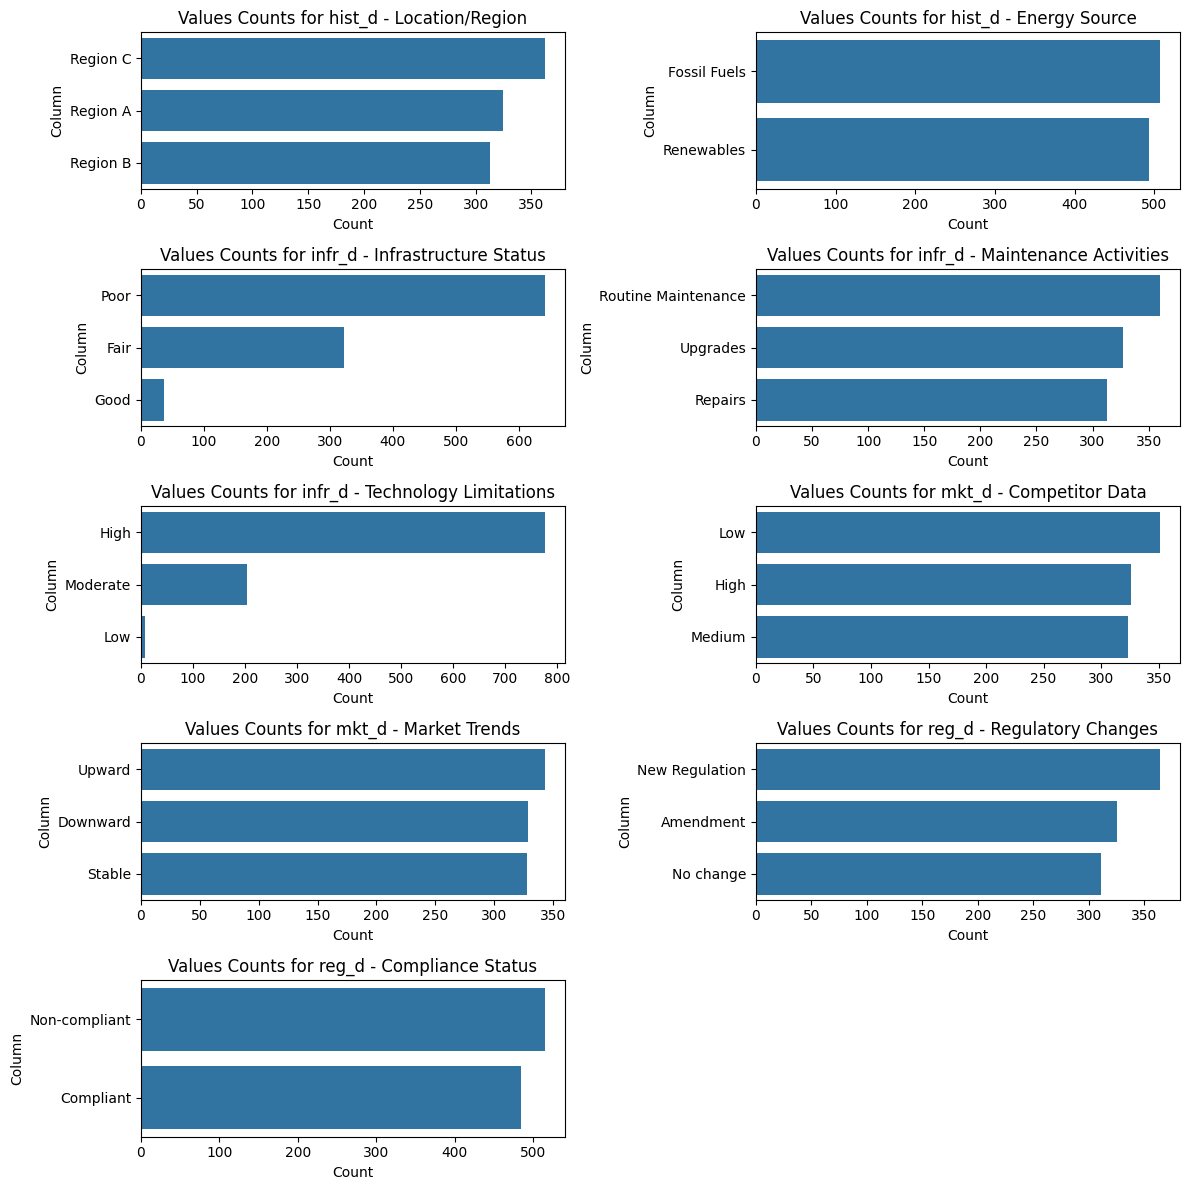

In [20]:
# Visualize Data
# Calculate the number of rows and columns for subplots

num_rows = (len(categorical_values_counts) + 1) // 2
num_cols = 2

#create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Flatten axes array for easier indexing
axes = axes.flatten()
 
#itereate through ccategorical_columns and plot into subplots
for i, ((dataset, column), counts) in enumerate(categorical_values_counts.items()):
    ax = axes[i]
    sns.barplot(x=counts.values, y = counts.index, ax=ax)
    ax.set_title(f'Values Counts for {dataset} - {column}')
    ax.set_xlabel('Count')
    ax.set_ylabel('Column')
# Hide any remaining empty subplots
for i in range(len(categorical_values_counts), num_rows * num_cols):
    fig.delaxes(axes[i])

#Adjust
plt.tight_layout()

plt.show()

## Energy Demand, Production, and Consumption Over Time
- We start analyzing the trends in energy demand, production, with consumption from the historical_energy_dataset
- This will give us insights into fluctuations and potential vulnerabilities in the energy market

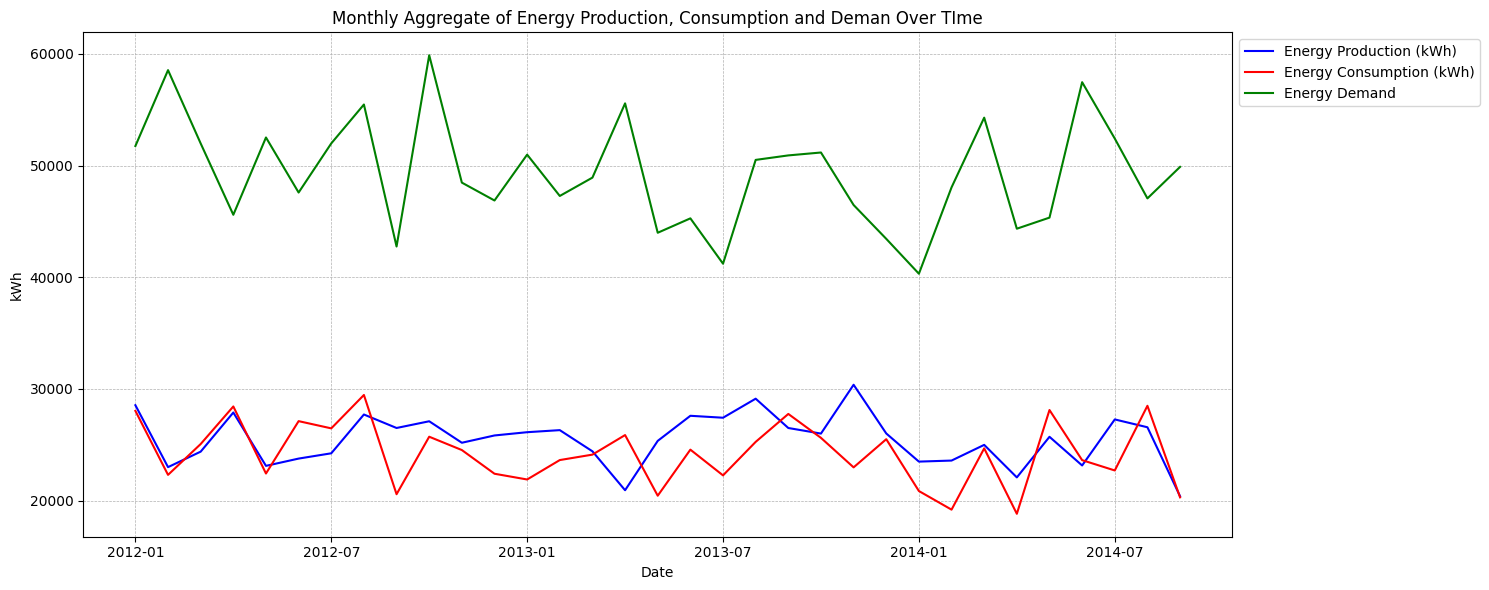

In [21]:
# Extract Year and Month from 'Date/Time' Column
hist_d['Year'] = hist_d['Date/Time'].dt.year
hist_d['Month'] = hist_d['Date/Time'].dt.month

#Create a new Column 'Year-Month' for easy plotting
hist_d['Year-Month'] = hist_d['Date/Time'].dt.to_period('M')

# Filter out non-numeric columns
numeric_columns = hist_d.select_dtypes(include='number').columns

#Aggregate numeric Data on a Monthly Basis
monthly_data = hist_d.groupby('Year-Month')[numeric_columns].mean()

# Set the Figsiz
plt.figure(figsize=(15, 6))

#Plot
sns.lineplot(data=monthly_data, x=monthly_data.index.astype(str), y='Energy Production (kWh)',
             label='Energy Production (kWh)', color='blue', linestyle='-', linewidth='1.5', errorbar=None)

sns.lineplot(data=monthly_data, x=monthly_data.index.astype(str), y='Energy Consumption (kWh)',
             label='Energy Consumption (kWh)', color='red', linestyle='-', linewidth='1.5', errorbar=None)

sns.lineplot(data=monthly_data, x=monthly_data.index.astype(str), y='Energy Demand',
             label='Energy Demand', color='green', linestyle='-', linewidth='1.5', errorbar=None)

#Set Title and Label
plt.title('Monthly Aggregate of Energy Production, Consumption and Deman Over TIme')
plt.xlabel('Date')
plt.ylabel('kWh')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

#plot labels
labels = monthly_data.index.astype(str).tolist()
n = 6
plt.xticks(labels[::n], rotation=360)

plt.tight_layout()

plt.show();

## Observation:
- Energy Production: Energy Produced by Energize Enterprise
- Energy Consumption: Energy Consumed by Customers
- Energy Demand: Energy needed by the market from Energize Enterprise.
- There is more Demand than Production
- There is need to ensure further investigations

## Market Price
- To understand the pricing dynamics and its relation to the market trends
- Visualization of the Market Price from the market dataset alongside the Energy Price from the historical energy dataset over time


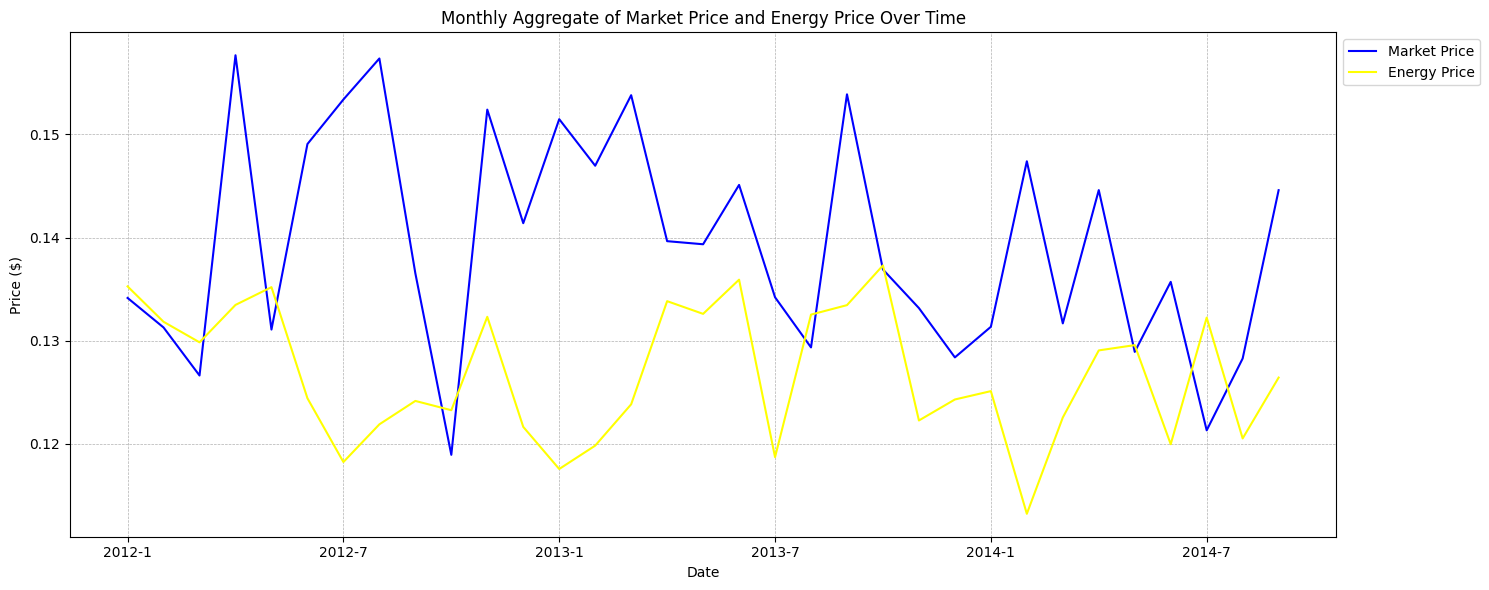

In [22]:
# Merge Historical Energy Data (hhist_d) with the Market Data (mkt_d) for a combined Analysis
merged_data = pd.merge(hist_d, mkt_d, on='Date/Time', how='inner')

# Set Date/Time as Index by extracting Date/Time for Aggregation
merged_data['Year'] = merged_data['Date/Time'].dt.year
merged_data['Month'] = merged_data['Date/Time'].dt.month

# Select only numeric columns for aggregation
numeric_columns = merged_data.select_dtypes(include='number').columns

#Aggregating data on a monthly basis
monthly_merged_data = merged_data.groupby(['Year', 'Month'])[numeric_columns].mean()

# Create new 'Year-month' Column for Plot
monthly_merged_data['Year-Month'] = monthly_merged_data.index.get_level_values(0).astype(str)+ '-'+monthly_merged_data.index.get_level_values(1).astype(str)

# Set the Figure size
plt.figure(figsize=(15, 6))

# Plot
sns.lineplot(data=monthly_merged_data, x='Year-Month', y='Market Price',
             label='Market Price', color='blue', linestyle='-', linewidth='1.5', errorbar=None)

sns.lineplot(data=monthly_merged_data, x='Year-Month', y='Energy Price',
             label='Energy Price', color='yellow', linestyle='-', linewidth='1.5', errorbar=None)

# Set Title and Labels
plt.title('Monthly Aggregate of Market Price and Energy Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot labels
labels = monthly_merged_data['Year-Month'].tolist()
n = 6
plt.xticks(labels[::n], rotation=360)

plt.tight_layout()
plt.show();

## Observation:
From the plot:
- Market Price: Average price based on market forces
- Energy Price : Average price which energix is selling.
- There is no consistency in price as Prices are fluctuating.
- Energix prices are lower compared to conventonal market prices
- Probable reason Energix have a high spike in demand is due to lower prices.
- A need to look more into the analysis

## Energy Demand and Energy Price Correlation:
- To check if energy demand is influenced by the current energy price

In [23]:
# Recall the hist_d and mkt_d data i.e 'merged_data'
merged_data.head(2)

,Date/Time,Location/Region,Energy Source,Energy Demand,Energy Consumption (kWh),Energy Price,Operational Costs,Energy Production (kWh),Year,Month,Year-Month,Market Price,Competitor Data,Market Trends,Market Demand
0,2012-01-01,Region A,Fossil Fuels,24016,21848,0.131630,1564.239198,31604,2012,1,2012-01,0.167891,High,Upward,13518
1,2012-01-02,Region C,Fossil Fuels,56200,34796,0.160969,3837.295411,11734,2012,1,2012-01,0.151762,Medium,Upward,2115


# Correlation Coeficient for:
- Energy Price and 
- 


In [24]:
correlation_energy_price = merged_data['Energy Demand'].corr(merged_data['Energy Price'])
correlation_market_price = merged_data['Market Demand'].corr(merged_data['Market Price'])

print(f'{correlation_energy_price} and {correlation_market_price}')

-0.005361840768503358 and 0.02980230214828854


## Infrastructure Status and Technology Limitations
- Understanding the state of infrastructure over time
- To visualize the frequency of various infrastructure Status and the distribution of Technology Limitations from Infrastructure_data.

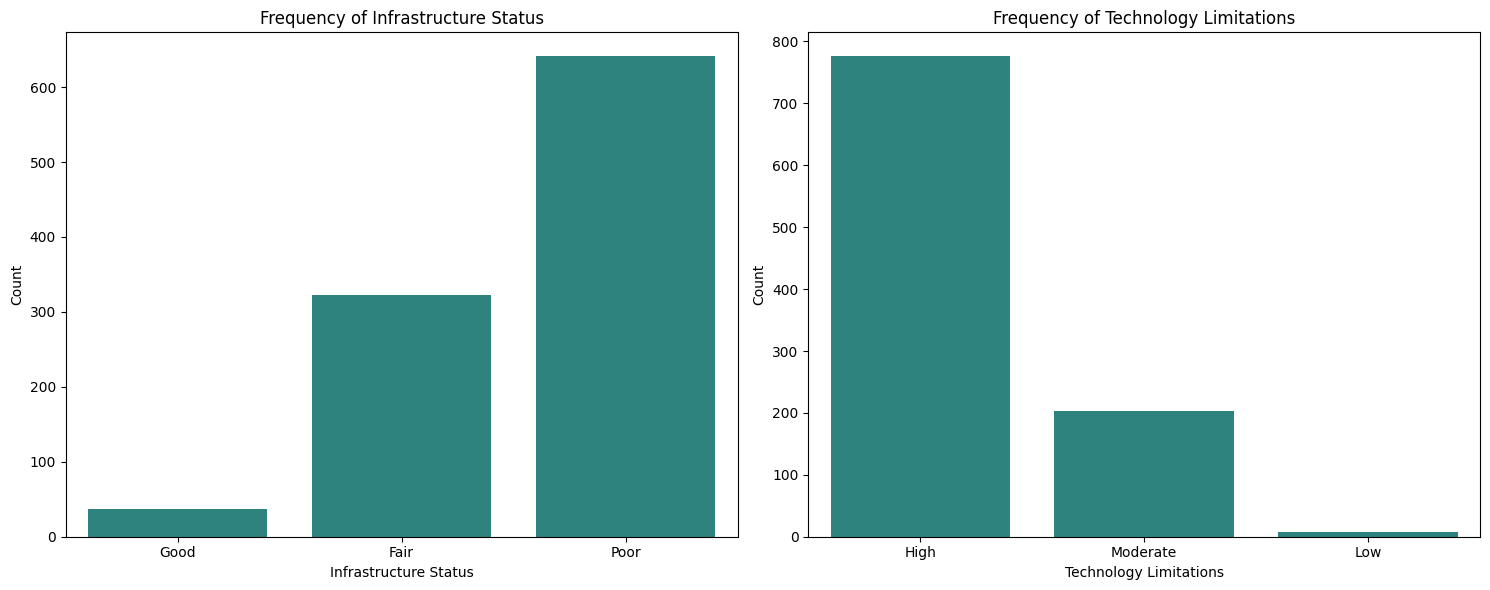

In [25]:
#Set up plot figure and axes:
fig, axes = plt.subplots(1, 2, figsize=(15,6))

#Frequency of Infrastructure Status plot
sns.countplot(data=infr_d, x='Infrastructure Status', ax=axes[0],order=['Good', 'Fair', 'Poor'], hue=True,legend=False, palette='viridis')
axes[0].set_title('Frequency of Infrastructure Status')
axes[0].set_xlabel('Infrastructure Status')
axes[0].set_ylabel('Count')

#Frequency of Technology Limitation plot
sns.countplot(data=infr_d, x='Technology Limitations', ax=axes[1], hue=True,legend=False, palette='viridis')
axes[1].set_title('Frequency of Technology Limitations')
axes[1].set_xlabel('Technology Limitations')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show();

## Observations:
From the plots:
- Infrastructure Is categorized into:
- - Good: Less Frequent almost non existent
  - Fair: Follows Poor status
  - Poor: Very Prevalent
This indicates reason why energix is unable to meet up with demands probably due to the kind of available infrastructure, hence need for a more proactive maintenance approach to infrastructure:

While:
- Technology Limitations is categorized into:
-- High: Data reveals technology limitation is very high followed by
 - Moderate: being average
 - Low: Almost non existent use of technology.
   Suggest hampering operational effectiveness and ability to market properly due to technology limitations.

## Infrastructure Status Relationship with Technology Limitations:
-To see how they both correlate, to help see a reason behind energix inability to meet up market with demand of products.


In [26]:
infr_d.head(1)

,Date/Time,Infrastructure Status,Maintenance Activities,Technology Limitations
0,2012-01-01,Poor,Repairs,High


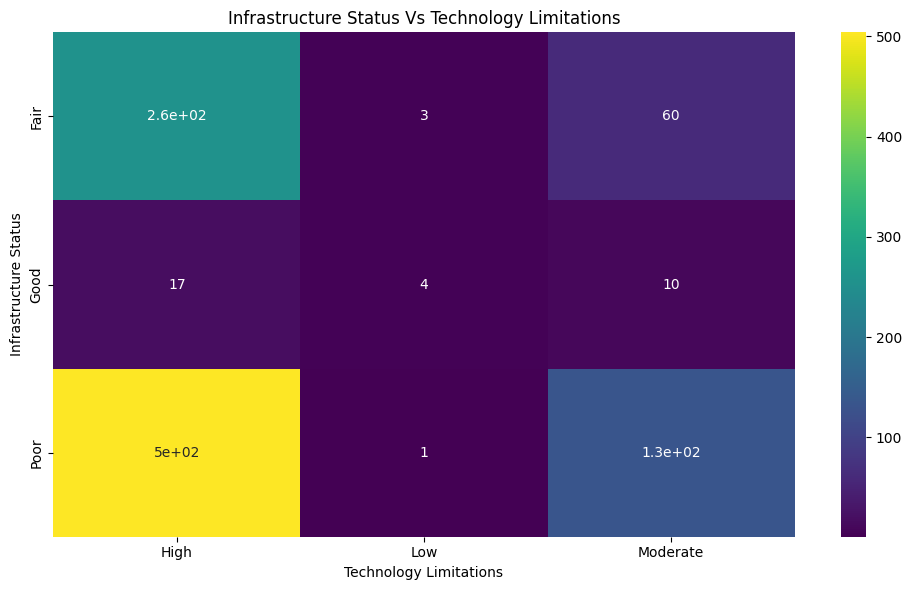

In [27]:
ct = pd.crosstab(infr_d['Infrastructure Status'], infr_d['Technology Limitations'])

plt.figure(figsize=(10,6))

sns.heatmap(ct, annot=True, cmap='viridis')
plt.title('Infrastructure Status Vs Technology Limitations')
plt.xlabel('Technology Limitations')
plt.ylabel('Infrastructure Status')

plt.tight_layout()

plt.show();

# Observations:
From the Heatmap plot the following assumptions are made;
- There is a strong correlation between poor Infrastructure Status and high Technology Limitations as it affect the inability of energix to meet market demand
- Hence for poor Infrastructure Status implies high Technology Limitations
- There is a need for upgrade and total overhaul of energix infrastructure, improve technology uage inorder to increase production to meet market demands.

## Justifying Assumptions:
- The correlation between poor infrastructure and high technology limitation and the energy production will guide the justification;abs


In [28]:
# Convert the categories into Binary
infr_d['Poor_Infrastructure'] = infr_d['Infrastructure Status'].apply(lambda x: 1 if x == 'Poor' else 0)
infr_d['High_Tech_Limitations'] = infr_d['Technology Limitations'].apply(lambda x: 1 if x == 'High' else 0)


infr_d['Combined'] = infr_d['Poor_Infrastructure']*infr_d['High_Tech_Limitations']

merged_data = pd.merge(hist_d, infr_d, on='Date/Time', how='inner')

corr_coef = merged_data['Energy Production (kWh)'].corr(merged_data['Combined'])

corr_coef

-0.015877155348918308

## Observation:
- Correlation coef. of -0.0158 indicates a weak linear relationship.

## Regulatory Changes And Compliance Cost
- To see the impact of regulatory changes on energix
- TO visualize the frequency of various Regulatory Changes and the distribution of Regulatory Changes And the distribution of Compliance Costs associated with these changes from the regulatory_data


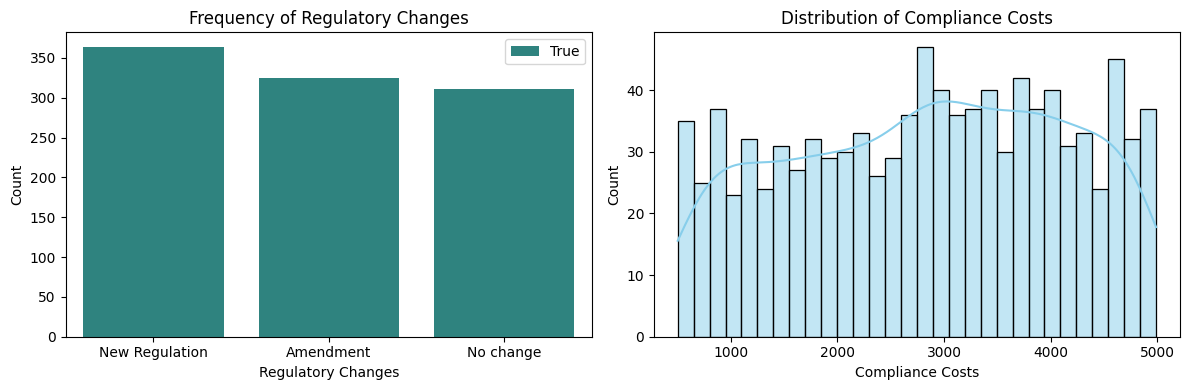

In [29]:
# Plots 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(data=reg_d, x ='Regulatory Changes', ax=ax1, hue = True, palette='viridis')
ax1.set_title('Frequency of Regulatory Changes')
ax1.set_label('Regulatory Changes')
ax1.set_ylabel('Count')

sns.histplot(data=reg_d, x='Compliance Costs', ax=ax2, bins=30, color='skyblue', kde=True)
ax2.set_title('Distribution of Compliance Costs')
ax2.set_label(' Compliance Costs')
ax2.set_ylabel('Count')


plt.tight_layout()

plt.show();

## Observation:
- Regulatory Changes, categorized into
- - New: Higher frequency indicating energix faces frequent new regulations, contributing factors
  - Amendment: Similar frequency with No Change
  - No Change:
- Distribution of Compliance Costs:
- - Shows relatively normal distribution

In [30]:
hist_d.head()

,Date/Time,Location/Region,Energy Source,Energy Demand,Energy Consumption (kWh),Energy Price,Operational Costs,Energy Production (kWh),Year,Month,Year-Month
0,2012-01-01,Region A,Fossil Fuels,24016,21848,0.131630,1564.239198,31604,2012,1,2012-01
1,2012-01-02,Region C,Fossil Fuels,56200,34796,0.160969,3837.295411,11734,2012,1,2012-01
2,2012-01-03,Region A,Renewables,81268,36244,0.155890,4418.260676,31523,2012,1,2012-01
3,2012-01-04,Region C,Fossil Fuels,61287,19955,0.130128,3743.417970,21205,2012,1,2012-01
4,2012-01-05,Region B,Fossil Fuels,93447,13788,0.151835,1071.513936,19548,2012,1,2012-01


## The Impact of Regulatory Changes and Operational Costs on Revenue:
- Visualizing the relationship between regulatory changes and the associated compliance costs, as well as the operational costs to Revenue generated from the company
- Revenue = Energy Consumption * Energy price
- Insights into the financial implications of regulatory changes and operational cost of Energix Enterprise.

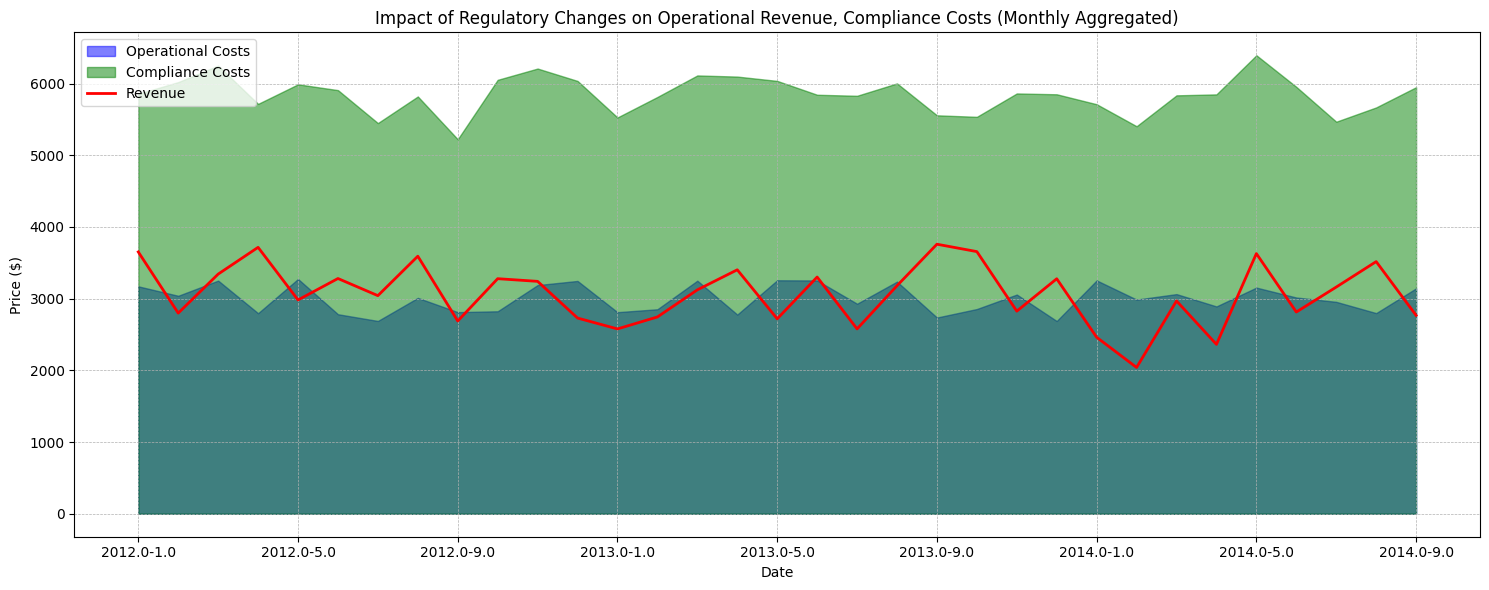

In [31]:
hist_d['Revenue'] = hist_d['Energy Price'] * hist_d['Energy Consumption (kWh)']

merged_reg_d = pd.merge(hist_d, reg_d, on = 'Date/Time', how='inner')

# Extract year and Month Column separately
merged_reg_d['Year'] = merged_reg_d['Date/Time'].dt.year

merged_reg_d['Month'] = merged_reg_d['Date/Time'].dt.month


# Select only numeric columns for aggregation
numeric_columns = merged_reg_d.select_dtypes(include='number').columns

#Aggregating data on a monthly basis
monthly_aggregated_data = merged_reg_d.groupby(['Year', 'Month'])[numeric_columns].mean()


# Create new 'Year-month' Column for Plot
monthly_aggregated_data['Year-Month'] = monthly_aggregated_data['Year'].astype(str) + '-' + monthly_aggregated_data['Month'].astype(str)




# Set the Figure size
plt.figure(figsize=(15, 6))

# Plot
plt.fill_between(monthly_aggregated_data['Year-Month'], monthly_aggregated_data['Operational Costs'], color = 'blue', label='Operational Costs', alpha = 0.5)

plt.fill_between(monthly_aggregated_data['Year-Month'], monthly_aggregated_data['Operational Costs'] + monthly_aggregated_data['Compliance Costs'], color = 'green', label='Compliance Costs', alpha = 0.5)

sns.lineplot(data=monthly_aggregated_data, x='Year-Month', y='Revenue',
             label='Revenue', color='red', linestyle='-', linewidth='2', errorbar=None)


# Set Title and Labels
plt.title('Impact of Regulatory Changes on Operational Revenue, Compliance Costs (Monthly Aggregated)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend(loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot labels
labels = monthly_aggregated_data['Year-Month'].tolist()
n = 4
plt.xticks(labels[::n], rotation=360)

plt.tight_layout()
plt.show();

## Observations:
- Operational Costs: Costs associated to the day to day running(operation) of energix enterprise
- Compliance Costs: Costs incurd to ahere to regulatory changes.
- Revenue: Money made from the business.

## Analyzing Competitions from Renewable Energy Providers:
- Competition from other energy providers and impact on Energix Enterprse, Analyzing Energy source from historical dataset
- Visualize the trends in energy production based on the energy source(Fossil Fuels Vs Renewable Energy) over time, To gain insights into how the production from renewable energy has evolved and potentially affected energix market share.

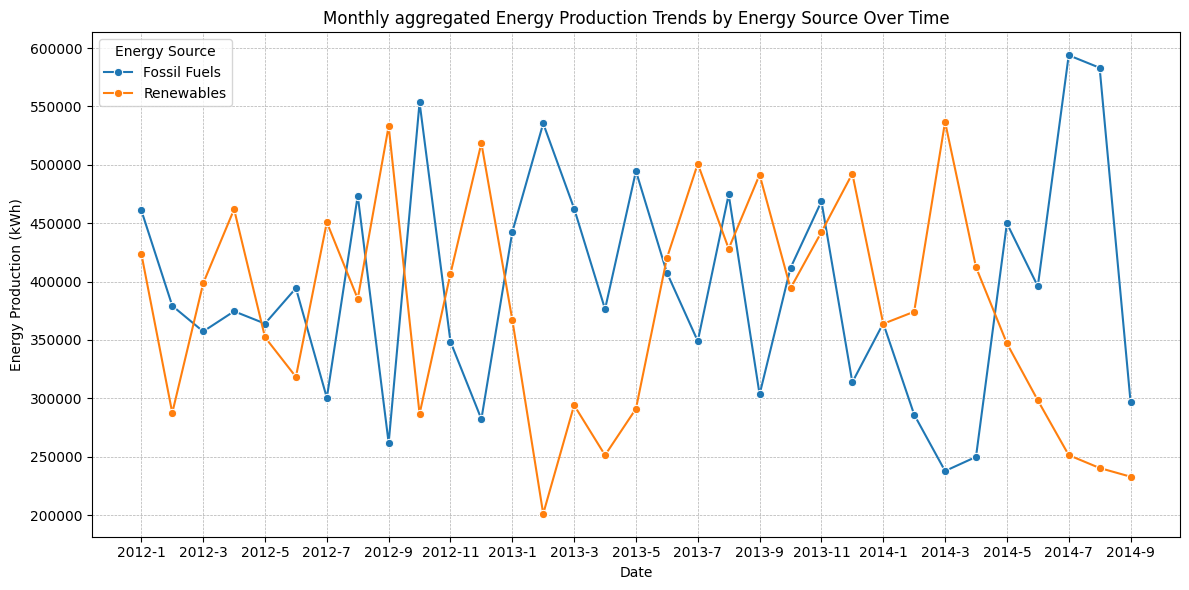

In [38]:
hist_d['Year'] = hist_d['Date/Time'].dt.year
hist_d['Month'] = hist_d['Date/Time'].dt.month

# Select only numeric columns for aggregation, excluding datetime columns
numeric_columns = hist_d.select_dtypes(include=['number']).columns

# Aggregating data on a monthly basis by Year, Month, and Energy Source
monthly_aggregated_data = hist_d.groupby(['Year', 'Month', 'Energy Source'])[numeric_columns].sum()['Energy Production (kWh)'].reset_index()

#
monthly_aggregated_data['Year-Month'] = monthly_aggregated_data['Year'].astype(str) + '-' + monthly_aggregated_data['Month'].astype(str)

# Set the Figure size
plt.figure(figsize=(12, 6))

# Plot
sns.lineplot(data=monthly_aggregated_data, x='Year-Month', y='Energy Production (kWh)', hue='Energy Source', marker='o')
# Set Title and Labels
plt.title('Monthly aggregated Energy Production Trends by Energy Source Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Production (kWh)')
plt.legend(title = 'Energy Source')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot labels
labels = monthly_aggregated_data['Year-Month'].tolist()
n = 4
plt.xticks(labels[::n], rotation=360)

plt.tight_layout()

plt.show();

### Observation:
The graph showcases energy production trends segmented by energy source (Fossil Fuels vs. Renewables) over time:
1. Fossil Fuels: Represents the energy produced from conventional sources.
2. Renewables: Represents the energy produced from renewable sources.
 
From the graph, we observe:
1. There are fluctuations in energy production from both fossil fuels and renewables.
2. Energy production from renewables has seen significant growth over certain periods, indicating a shift towards sustainable energy sources.
3. There are periods where the production from renewables surpasses that of fossil fuels. This could be indicative of the rising competition from renewable energy providers, potentially impacting Energix Enterprise's market share.
4. Understanding these trends is crucial for Energix Enterprise to adapt its strategies and maintain competitiveness in the evolving energy market.
 
Next, let's analyze the impact of regulatory changes on the company's operations, specifically how evolving regulations might have affected operational costs.